In [1]:
import numpy as np
import swiftest
import matplotlib.pyplot as plt

In [2]:
swiftersim = swiftest.Simulation(param_file="param.swifter.in", codename="Swifter")
swiftersim.bin2xr()

Reading Swifter file param.swifter.in
Reading in time 4.200e+03
Creating Dataset
Successfully converted 8 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
swiftestsim = swiftest.Simulation(param_file="param.swiftest.in")
swiftestsim.bin2xr()

Reading Swiftest file param.swiftest.in
Reading in time 4.200e+03
Creating Dataset
Successfully converted 8 output frames.

Adding particle info to Dataset
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestsim.ds - swiftersim.ds

No handles with labels found to put in legend.


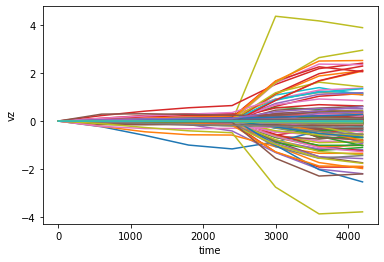

In [5]:
fig, ax = plt.subplots()
swiftdiff['vz'].plot.line(ax=ax, x="time")
legend = ax.legend()
legend.remove()
plt.show()
print("")

In [20]:
last = swiftdiff.isel(time=1)

In [21]:
badval = last.where(last['pz'] != 0, drop=True)

In [23]:
badval.sel(id=1130)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    id       float64 1.13e+03
    time     float64 600.0
Data variables:
    Gmass    float64 0.0
    Radius   float64 0.0
    px       float64 0.0
    py       float64 0.0
    pz       float64 2.547e-11
    vx       float64 -3.286e-11
    vy       float64 8.617e-11
    vz       float64 -2.795e-11

In [15]:
swiftdiff.sel(id=2)['px']

<xarray.DataArray 'px' (time: 8)>
array([ 0.00000000e+00, -4.65661287e-10, -4.09223139e-06, -1.73607841e-05,
       -4.62410972e-05,  3.44669074e-03, -3.59948692e-01,  2.63233909e+00])
Coordinates:
    id       float64 2.0
  * time     (time) float64 0.0 600.0 1.2e+03 1.8e+03 ... 3e+03 3.6e+03 4.2e+03